In [1]:
install.packages('h2o')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘RCurl’




In [2]:
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




In [3]:
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpjVBCvE/file1f672554449/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpjVBCvE/file1f627f67143/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: ..... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 16 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.42.0.2 
    H2O cluster version age:    3 months and 23 days 
    H2O cluster name:           H2O_started_from_R_root_asx505 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.17 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:  

Warning message in h2o.clusterInfo():
“
Your H2O cluster version is (3 months and 23 days) old. There may be a newer version available.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html”


In [4]:
df <- h2o.importFile("https://drive.google.com/u/0/uc?id=14XVqtU6y7hs9LvrX5dyPSp5KCBix2PuX&export=download")

  |======================================================================| 100%


In [5]:
df
class(df)
summary(df)

  id y amount_current_loan  term credit_score       loan_purpose yearly_income
1  1 0              386342 short    very_good              other       1371971
2  2 0              429000 short         good debt_consolidation        823042
3  3 0              344608 short         good debt_consolidation       1316567
4  4 0               71214 short           NA debt_consolidation           NaN
5  5 0              654126 short         good debt_consolidation       1242847
6  6 0              133034 short         good debt_consolidation        651035
  home_ownership bankruptcies
1           rent            0
2       mortgage            0
3           rent            0
4           rent            0
5           rent            0
6           rent            0

[1000000 rows x 9 columns] 

[1] "H2OFrame"

Warning message in summary.H2OFrame(df):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”


 id                y             amount_current_loan term         
 Min.   :      1   Min.   :0.0   Min.   : 10802      short:685222 
 1st Qu.: 249751   1st Qu.:0.0   1st Qu.:174276      long :314778 
 Median : 499501   Median :0.5   Median :269247                   
 Mean   : 500000   Mean   :0.5   Mean   :316659                   
 3rd Qu.: 749251   3rd Qu.:1.0   3rd Qu.:435057                   
 Max.   :1000000   Max.   :1.0   Max.   :789250                   
                                                                  
 credit_score      loan_purpose               yearly_income      
 good     :493169  debt_consolidation:785428  Min.   :    76627  
 very_good:132719  other             : 91481  1st Qu.:   738550  
 fair     : 59779  home_improvements : 57517  Median :  1069512  
 NA       :314333  business_loan     : 17756  Mean   :  1344805  
                   buy_a_car         : 11855  3rd Qu.:  1565954  
                   medical_bills     : 11521  Max.   :165557393  
  

In [6]:
y <- "y"
x <- setdiff(names(df), c(y, "id"))
df$y <- as.factor(df$y)
summary(df)

Warning message in summary.H2OFrame(df):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”


 id                y        amount_current_loan term          credit_score     
 Min.   :      1   0:5e+05  Min.   : 10802      short:685222  good     :493169 
 1st Qu.: 249751   1:5e+05  1st Qu.:174276      long :314778  very_good:132719 
 Median : 499501            Median :269247                    fair     : 59779 
 Mean   : 500000            Mean   :316659                    NA       :314333 
 3rd Qu.: 749251            3rd Qu.:435057                                     
 Max.   :1000000            Max.   :789250                                     
                                                                               
 loan_purpose               yearly_income       home_ownership  
 debt_consolidation:785428  Min.   :    76627   mortgage:472464 
 other             : 91481  1st Qu.:   738550   rent    :435450 
 home_improvements : 57517  Median :  1069512   own     : 92086 
 business_loan     : 17756  Mean   :  1344805                   
 buy_a_car         : 11855  3rd Qu.

In [7]:
splits <- h2o.splitFrame(df, c(0.6,0.2), seed=123)
train  <- h2o.assign(splits[[1]], "train") # 60%
valid  <- h2o.assign(splits[[2]], "valid") # 20%
test   <- h2o.assign(splits[[3]], "test")  # 20%

In [8]:
aml <- h2o.automl(x = x,
                  y = y,
                  training_frame = train,
                  validation_frame = valid,
                  max_runtime_secs = 60)

  |======================================================================| 100%


In [9]:
aml@leaderboard
model <- aml@leader

                                                 model_id       auc   logloss
1                          GBM_1_AutoML_1_20231117_161435 0.7073099 0.6201751
2                      XGBoost_1_AutoML_1_20231117_161435 0.7059623 0.5992885
3 StackedEnsemble_BestOfFamily_1_AutoML_1_20231117_161435 0.7059279 0.6094852
4                          GLM_1_AutoML_1_20231117_161435 0.6651450 0.6511914
      aucpr mean_per_class_error      rmse       mse
1 0.7460705            0.4189173 0.4649858 0.2162118
2 0.7449283            0.4283320 0.4594473 0.2110918
3 0.7448400            0.4304820 0.4617235 0.2131886
4 0.6633261            0.4333185 0.4788349 0.2292829

[4 rows x 7 columns] 

In [10]:
h2o.performance(model, train = TRUE)

H2OBinomialMetrics: gbm
** Reported on training data. **

MSE:  0.2135693
RMSE:  0.4621356
LogLoss:  0.6146866
Mean Per-Class Error:  0.4033733
AUC:  0.7232143
AUCPR:  0.7572401
Gini:  0.4464286
R^2:  0.1457216

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
           0      1    Error            Rate
0      71640 168616 0.701818  =168616/240256
1      25152 214554 0.104929   =25152/239706
Totals 96792 383170 0.403715  =193768/479962

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold         value idx
1                       max f1  0.400007      0.688914 300
2                       max f2  0.301764      0.834038 373
3                 max f0point5  0.515632      0.665296 184
4                 max accuracy  0.515632      0.655616 184
5                max precision  0.858564      1.000000   0
6                   max recall  0.240003      1.000000 398
7              max specificity  0.858564      1.0

In [ ]:
h2o.performance(model, valid = TRUE)

H2OBinomialMetrics: xgboost
** Reported on validation data. **

MSE:  0.2106613
RMSE:  0.4589785
LogLoss:  0.5977241
Mean Per-Class Error:  0.419191
AUC:  0.7071561
AUCPR:  0.7462427
Gini:  0.4143123
R^2:  0.1573509

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
           0      1    Error           Rate
0      26494  73279 0.734457   =73279/99773
1      10414  89793 0.103925  =10414/100207
Totals 36908 163072 0.418507  =83693/199980

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold         value idx
1                       max f1  0.343003      0.682113 293
2                       max f2  0.163999      0.834140 385
3                 max f0point5  0.534488      0.650325 154
4                 max accuracy  0.505165      0.644379 175
5                max precision  0.978874      1.000000   0
6                   max recall  0.100379      1.000000 398
7              max specificity  0.978874      1.

In [11]:
perf <- h2o.performance(model, newdata = test)
perf

H2OBinomialMetrics: gbm

MSE:  0.2160452
RMSE:  0.4648067
LogLoss:  0.6198007
Mean Per-Class Error:  0.4175859
AUC:  0.7077342
AUCPR:  0.7465175
Gini:  0.4154684
R^2:  0.1358179

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
           0      1    Error           Rate
0      26564  73200 0.733732   =73200/99764
1      10143  89847 0.101440   =10143/99990
Totals 36707 163047 0.417228  =83343/199754

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold        value idx
1                       max f1  0.394346     0.683151 305
2                       max f2  0.281071     0.833819 385
3                 max f0point5  0.513853     0.653100 185
4                 max accuracy  0.513853     0.646310 185
5                max precision  0.855585     1.000000   0
6                   max recall  0.234874     1.000000 399
7              max specificity  0.855585     1.000000   0
8             max absolute_mcc  0.6

In [12]:
h2o.auc(perf)

[1] 0.7077342

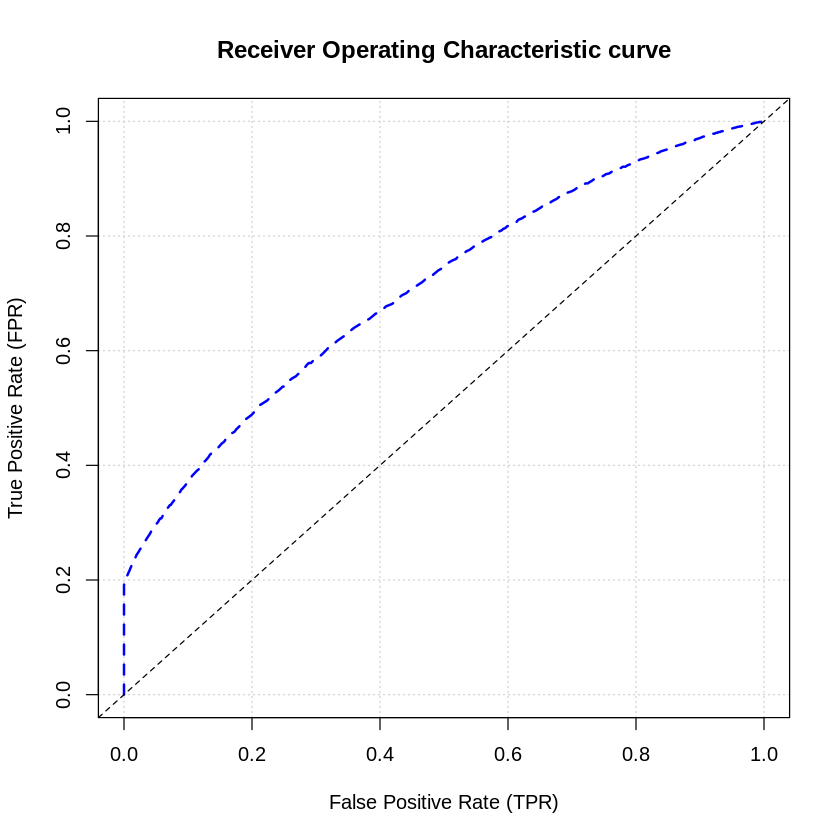

In [13]:
plot(perf, type = "roc")